At first step, we import all packages that will use.

In [1]:
# Import packages
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Set style & figures inline
sns.set()
import plotly.graph_objects as go
%matplotlib inline

import scipy.stats as stats

# formulat interface to statsmodels (standard linear models)
import statsmodels.formula.api as smf

# easy-to-use traditional psychological stats (t-test, anova)
import pingouin as pg

# hate these things
import warnings
warnings.filterwarnings("ignore")

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

After import all packages, we import our dataset.

In [2]:
# Import datasets as pandas dataframes
df = pd.read_csv('bd-covid-19-owid.csv')
df

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests
0,3/3/20,NaN,NaN,NaN,NaN,108.0,108.0
1,4/3/20,NaN,NaN,NaN,NaN,3.0,111.0
2,5/3/20,NaN,NaN,NaN,NaN,NaN,NaN
3,6/3/20,NaN,NaN,NaN,NaN,9.0,120.0
4,7/3/20,NaN,NaN,NaN,NaN,7.0,127.0
...,...,...,...,...,...,...,...
445,22/5/21,787726.0,1028.0,12348.0,38.0,12230.0,5795004.0
446,23/5/21,789080.0,1354.0,12376.0,28.0,15205.0,5810209.0
447,24/5/21,790521.0,1441.0,12401.0,25.0,17683.0,5827892.0
448,25/5/21,792196.0,1675.0,12441.0,40.0,16624.0,5844516.0


We know that there are some missing values in our data, so we solve all missing values.

At first step, we should check how many missing values in our data.

In [3]:
# checking missing values
df.isnull().sum()

date             0
total_cases      5
new_cases        5
total_deaths    15
new_deaths      15
new_tests        2
total_tests      2
dtype: int64

Almost all of columns have the missing values, because I need the data, I decide to give a 0 value for all of missing values. so we can solve the use this code:

In [4]:
#df = df.dropna(how='any') -> for drop
df.replace( np.nan,0, inplace=True)
df= df.reset_index(drop=True)
df

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests
0,3/3/20,0.0,0.0,0.0,0.0,108.0,108.0
1,4/3/20,0.0,0.0,0.0,0.0,3.0,111.0
2,5/3/20,0.0,0.0,0.0,0.0,0.0,0.0
3,6/3/20,0.0,0.0,0.0,0.0,9.0,120.0
4,7/3/20,0.0,0.0,0.0,0.0,7.0,127.0
...,...,...,...,...,...,...,...
445,22/5/21,787726.0,1028.0,12348.0,38.0,12230.0,5795004.0
446,23/5/21,789080.0,1354.0,12376.0,28.0,15205.0,5810209.0
447,24/5/21,790521.0,1441.0,12401.0,25.0,17683.0,5827892.0
448,25/5/21,792196.0,1675.0,12441.0,40.0,16624.0,5844516.0


# The Visualization of Data

In [5]:
#for our local dataset
df.date = pd.to_datetime(df.date)

#for the most up-to-date dataset directly fetched from the remote repository
df.date = pd.to_datetime(df.date)

df = df.copy()


In [6]:
# Daily Confirmed Cases

x=df[df["new_cases"] != 0]["date"]
y = df[df["new_cases"] != 0]["new_cases"]
                    


fig = go.Figure()

fig.add_trace(go.Bar(x=x,
                    y = y,
                    text = y,
                    textposition = "auto"))

fig.update_layout(title = dict(text = "Daily confirmed cases",
                              font_size = 25
                              ),
                 yaxis = dict(title = "Number of cases"),
                 xaxis = dict(title = "Date"))

In [7]:
# Daily New Deaths

x=df[df["new_deaths"] != 0]["date"]
y = df[df["new_deaths"] != 0]["new_deaths"]


fig = go.Figure()

fig.add_trace(go.Bar(x=x,
                    y = y,
                    text = y,
                    textposition = "auto"))

fig.update_layout(title = dict(text = "Daily new deaths",
                              font_size = 20
                              ),
                 yaxis = dict(title = "Number of cases"),
                 xaxis = dict(title = "Date"))

In [8]:
# Daily confirmed vs Death cases

x=df[df["new_cases"] != 0]["date"]
y1 = df[df["new_cases"] != 0]["new_cases"]
y2 = df[df["new_cases"] != 0]["new_deaths"]


fig = go.Figure()

fig.add_trace(go.Bar(x=x,
                    y = y1,
                    name = "confirmed cases"
                    ))

fig.add_trace(go.Bar(x=x,
                    y = y2,
                    name = "death cases"
                    ))

fig.update_layout(title = dict(text = "Daily confirmed vs Death cases",
                              font_size = 20
                              ),
                 yaxis = dict(title = "Number of cases"),
                 xaxis = dict(title = "Date"))

# Descriptive Analyst

There are so many ways to find the descriptive analyst. In this example, we use describe function.

In [9]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests
count,450.000000,450.000000,450.000000,450.000000,450.000000,4.500000e+02
mean,353569.104444,1763.762222,5181.553333,27.684444,13024.333333,2.296959e+06
std,242059.764430,1415.289533,3683.662931,20.499942,6673.710220,1.780919e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,120063.500000,658.250000,1554.250000,14.000000,10925.000000,6.510822e+05
50%,382117.000000,1534.500000,5585.000000,25.000000,13479.500000,2.108206e+06
75%,536435.500000,2522.250000,8158.750000,37.000000,15625.750000,3.687228e+06
max,793693.000000,7626.000000,12458.000000,112.000000,34968.000000,5.860950e+06


We alse can use other functions to find the descriptive analyst

In [10]:
# Mean
data1 = df.drop('date', axis=1)
for i, col in enumerate(list(data1.columns.values)):
    avg = statistics.mean(data1[col])
    print('The average of {} column is: '.format(col), avg)

The average of total_cases column is:  353569.10444444447
The average of new_cases column is:  1763.7622222222221
The average of total_deaths column is:  5181.553333333333
The average of new_deaths column is:  27.684444444444445
The average of new_tests column is:  13024.333333333334
The average of total_tests column is:  2296959.308888889


In [11]:
# Harmonic Mean
for i, col in enumerate(list(data1.columns.values)):
    h_avg = statistics.harmonic_mean(data1[col])
    print('The harmonic mean of {} column is: '.format(col), h_avg)

The harmonic mean of total_cases column is:  0
The harmonic mean of new_cases column is:  0
The harmonic mean of total_deaths column is:  0
The harmonic mean of new_deaths column is:  0
The harmonic mean of new_tests column is:  0
The harmonic mean of total_tests column is:  0


In [12]:
# Standar Deviation
for i, col in enumerate(list(data1.columns.values)):
    std = statistics.stdev(data1[col])
    print('The standard deviation of {} column is: '.format(col), std)

The standard deviation of total_cases column is:  242059.7644298795
The standard deviation of new_cases column is:  1415.2895330167485
The standard deviation of total_deaths column is:  3683.6629311991105
The standard deviation of new_deaths column is:  20.49994247974499
The standard deviation of new_tests column is:  6673.710220143656
The standard deviation of total_tests column is:  1780919.0315807476


# Correlation Analyst

In [13]:
# Correlation each column
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests
total_cases,1.000000,0.230779,0.997959,0.428628,0.712409,0.984563
new_cases,0.230779,1.000000,0.191183,0.771703,0.759478,0.223746
total_deaths,0.997959,0.191183,1.000000,0.392727,0.689441,0.990164
new_deaths,0.428628,0.771703,0.392727,1.000000,0.681314,0.404167
new_tests,0.712409,0.759478,0.689441,0.681314,1.000000,0.704799
total_tests,0.984563,0.223746,0.990164,0.404167,0.704799,1.000000


The dark color shows the high correlation between the variables and the light colors shows less correlation between the variables.

From this table we can see that the correlation between total column and each total column show the high correlation, and the correlation between new columns and each new columns show the same high correlation.

Meanwhile, the table shows a small correlation analyst between new columns and total columns.

## Visualization of Correlation

The first visualization is the correlation of each total column.

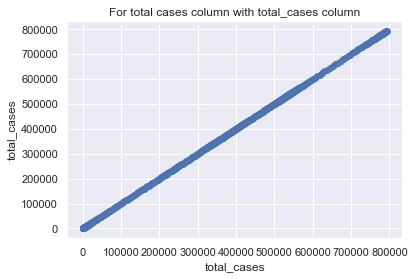

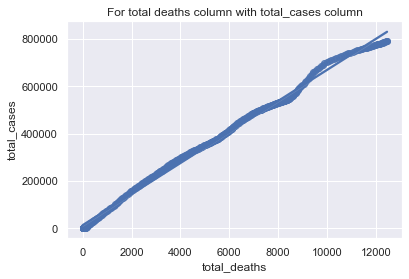

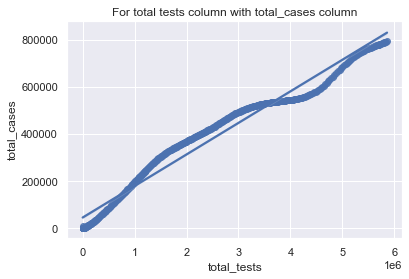

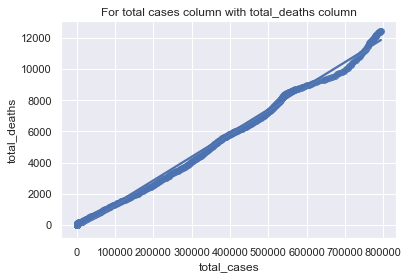

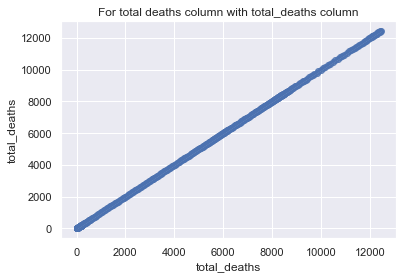

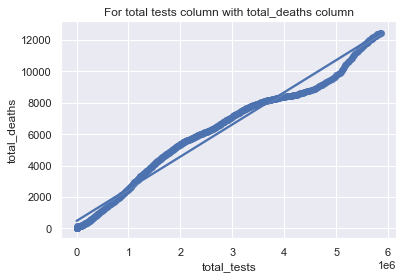

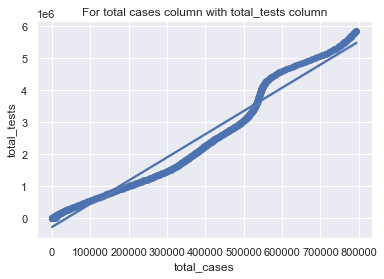

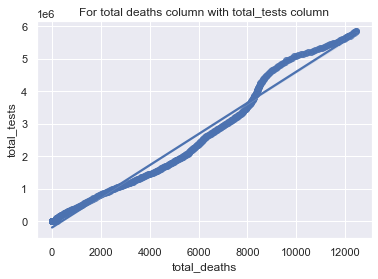

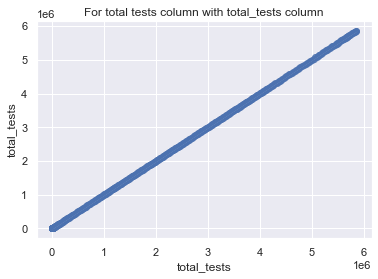

In [14]:
data2 = df[['total_cases','total_deaths','total_tests']]
for i, col in enumerate(list(data2.columns.values)):
        sns.regplot(x=data2['total_cases'], y=data2[col]).set(title="For total cases column with {} column".format(col))
        plt.show()
        
        sns.regplot(x=data2['total_deaths'], y=data2[col]).set(title="For total deaths column with {} column".format(col))
        plt.show()
        
        sns.regplot(x=data2['total_tests'], y=data2[col]).set(title="For total tests column with {} column".format(col))
        plt.show()

We can conclude, all total columns have a high positive correlation each others.

Then, we visualized the correlation of each new column.

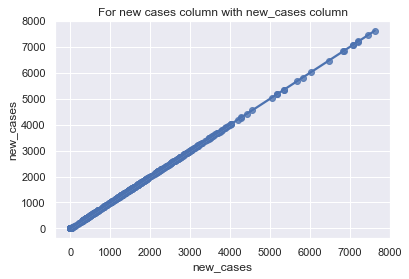

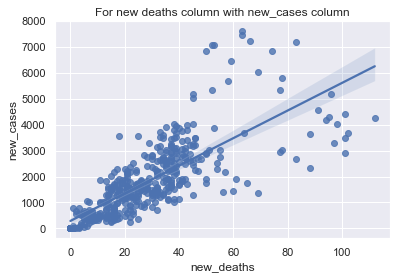

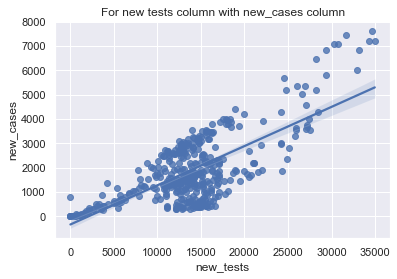

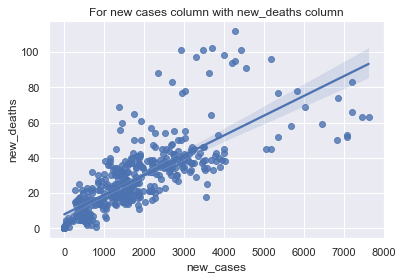

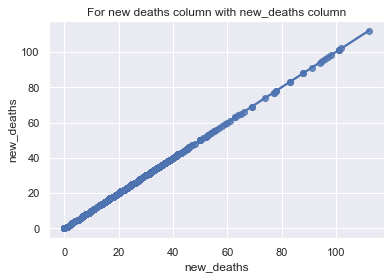

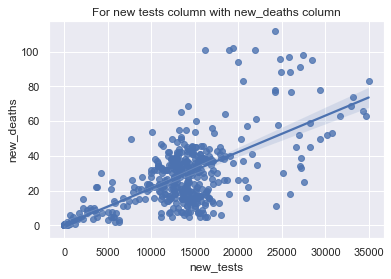

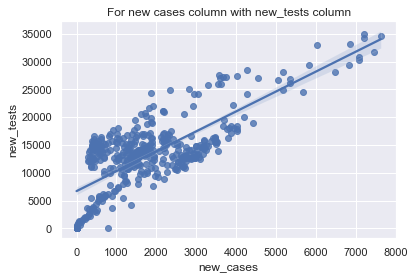

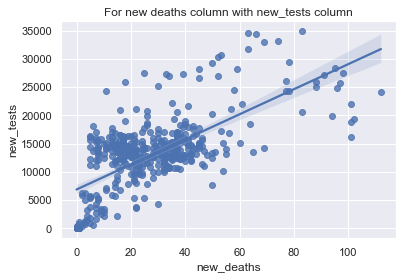

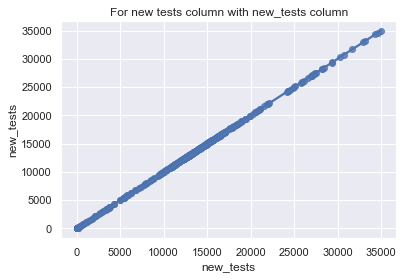

In [15]:
data3 = df[['new_cases','new_deaths','new_tests']]
for i, col in enumerate(list(data3.columns.values)):
        sns.regplot(x=data3['new_cases'], y=data3[col]).set(title="For new cases column with {} column".format(col))
        plt.show()
        
        sns.regplot(x=data3['new_deaths'], y=data3[col]).set(title="For new deaths column with {} column".format(col))
        plt.show()
        
        sns.regplot(x=data3['new_tests'], y=data3[col]).set(title="For new tests column with {} column".format(col))
        plt.show()

That we can, the new columns also have a positive correlation each others.

# T-test Analyst

###  New Column:

We have two hypotheses for new cases and new deaths:

H0: There is no correlation between data case or test of Covid-19 and the number of deaths or cases.
H1: They have a correlation.

Then, we can use this function:

In [16]:
# T-test for new cases with new deaths
pg.ttest(x=data1['new_cases'], y=data1['new_deaths'],paired=False, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,26.01864,898,two-sided,1.131780e-111,"[1605.12, 1867.03]",1.734576,5.104e+107,1.0


From the first case, we reject the null hypothesis since it is statistically different given the significance level of 0.05 which means that a new case of covid-19 will affect the number of deaths.

In [17]:
# T-test for new tests with new deaths
pg.ttest(x=data1['new_tests'], y=data1['new_deaths'],paired=False, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,41.311242,898,two-sided,7.390633e-210,"[12379.21, 13614.09]",2.754083,3.531e+205,1.0


From this case, we reject the null hypothesis since it is statistically different given the significance level of 0.05 which means that a new test of covid-19 will affect the number of deaths.

In [18]:
# T-test for new tests with new cases
pg.ttest(x=data1['new_tests'], y=data1['new_cases'],paired=False, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,35.014402,898,two-sided,4.699974e-170,"[10629.4, 11891.74]",2.334293,7.262e+165,1.0


From this case, we reject the null hypothesis since it is statistically different given the significance level of 0.05 which means that a new test of covid-19 will affect the number of cases.

### Column Total:

In [19]:
# T-test for total cases with total deaths
pg.ttest(x=data1['total_cases'], y=data1['total_deaths'],paired=False, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.527834,898,two-sided,5.718030e-141,"[325990.0, 370785.1]",2.035189,7.561e+136,1.0


From this case, we reject the null hypothesis since it is statistically different given the significance level of 0.05 which means that a total case of covid-19 will affect the total of deaths.

In [20]:
# T-test for new tests with new deaths
pg.ttest(x=data1['total_tests'], y=data1['total_deaths'],paired=False, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,27.298177,898,two-sided,5.936271e-120,"[2127009.83, 2456545.68]",1.819878,8.907e+115,1.0


From this case, we reject the null hypothesis since it is statistically different given the significance level of 0.05 which means that a total tests of covid-19 will affect the total of deaths.

In [21]:
# T-test for total tests with total cases
pg.ttest(x=data1['total_tests'], y=data1['total_cases'],paired=False, correction=False)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,22.937557,898,two-sided,5.220015e-92,"[1777107.65, 2109672.76]",1.52917,1.403e+88,1.0


From this case, we reject the null hypothesis since it is statistically different given the significance level of 0.05 which means that a total test of covid-19 will affect the total of cases.

### Devided Data by Year

In [22]:
# Devided data by year
df['year'] = df['date'].dt.year
df.head()

,date,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests,year
0,2020-03-03,0.0,0.0,0.0,0.0,108.0,108.0,2020
1,2020-04-03,0.0,0.0,0.0,0.0,3.0,111.0,2020
2,2020-05-03,0.0,0.0,0.0,0.0,0.0,0.0,2020
3,2020-06-03,0.0,0.0,0.0,0.0,9.0,120.0,2020
4,2020-07-03,0.0,0.0,0.0,0.0,7.0,127.0,2020


Average all columns per year

In [23]:
# mean marks and project submissions for each student
df.groupby('year')[['total_cases', 'new_cases','total_deaths', 'new_deaths', 'new_tests', 'total_tests']].agg('mean')

,total_cases,new_cases,total_deaths,new_deaths,new_tests,total_tests
year,,,,,,
2020,226346.967105,1689.177632,3186.641447,24.865132,10606.608553,1.264258e+06
2021,618469.993151,1919.061644,9335.342466,33.554795,18058.500000,4.447241e+06


We have two hypotheses for new cases:

H0: There is no significant different between average of covid-19 data in two years.

H1: There are significant different.

Then, we can use this function:

In [24]:
# New Cases
stats.ttest_ind(df['new_cases'][df['year'] == 2021], df['new_cases'][df['year'] == 2020])

Ttest_indResult(statistic=1.6160262882148193, pvalue=0.10679257246889003)

Because of the p-value > 0.05, so we reject the null hypothesis and accept the hypothesis one.

In [25]:
# New deaths
stats.ttest_ind(df['new_deaths'][df['year'] == 2021], df['new_deaths'][df['year'] == 2020])

Ttest_indResult(statistic=4.290596186911464, pvalue=2.1848423961787563e-05)

Because of the p-value > 0.05, so we reject the null hypothesis and accept the hypothesis one.

In [26]:
# New deaths
stats.ttest_ind(df['new_tests'][df['year'] == 2021], df['new_tests'][df['year'] == 2020])

Ttest_indResult(statistic=12.999266080966093, pvalue=5.250014597177547e-33)

Because of the p-value > 0.05, so we reject the null hypothesis and accept the hypothesis one.

In [27]:
# Total Cases
stats.ttest_ind(df['total_cases'][df['year'] == 2021], df['total_cases'][df['year'] == 2020])

Ttest_indResult(statistic=24.693001534236565, pvalue=1.3181547880196728e-85)

Because of the p-value > 0.05, so we reject the null hypothesis and accept the hypothesis one.

In [28]:
# Total Deaths
stats.ttest_ind(df['total_deaths'][df['year'] == 2021], df['total_deaths'][df['year'] == 2020])

Ttest_indResult(statistic=26.584511522902588, pvalue=3.7341310165830364e-94)

Because of the p-value > 0.05, so we reject the null hypothesis and accept the hypothesis one.

In [29]:
# Total Tests
stats.ttest_ind(df['total_tests'][df['year'] == 2021], df['total_tests'][df['year'] == 2020])

Ttest_indResult(statistic=32.46248610360319, pvalue=9.481955452925182e-120)

Because of the p-value > 0.05, so we reject the null hypothesis and accept the hypothesis one.

# Spearman Rank correlation

### New Columns

New cases column with each columns

In [30]:
from scipy.stats import spearmanr

new_data = df.drop(['date','year'], axis=1)
for i, col in enumerate(list(new_data.columns.values)):
    #calculate Spearman Rank correlation and corresponding p-value
    rho, p = spearmanr(new_data['new_cases'], new_data[col])
    #print Spearman rank correlation and p-value
    print('The Spearman rank correlation for new_cases with {}'.format(col),rho)
    print('The p-value for new_cases with {}'.format(col),p)
    print('===========')

The Spearman rank correlation for new_cases with total_cases 0.18502305589970136
The p-value for new_cases with total_cases 7.875579070105104e-05
The Spearman rank correlation for new_cases with new_cases 1.0
The p-value for new_cases with new_cases 0.0
The Spearman rank correlation for new_cases with total_deaths 0.1849938415487999
The p-value for new_cases with total_deaths 7.896470032850287e-05
The Spearman rank correlation for new_cases with new_deaths 0.8540484702492968
The p-value for new_cases with new_deaths 3.062524023461502e-129
The Spearman rank correlation for new_cases with new_tests 0.6135508084538608
The p-value for new_cases with new_tests 6.896595575583382e-48
The Spearman rank correlation for new_cases with total_tests 0.1843090383804567
The p-value for new_cases with total_tests 8.401385413508994e-05


New deaths column with each columns

In [31]:
for i, col in enumerate(list(new_data.columns.values)):
    #calculate Spearman Rank correlation and corresponding p-value
    rho, p = spearmanr(new_data['new_deaths'], new_data[col])
    #print Spearman rank correlation and p-value
    print('The Spearman rank correlation for new deaths with {}'.format(col),rho)
    print('The p-value for new_cases with {}'.format(col),p)
    print('===========')

The Spearman rank correlation for new deaths with total_cases 0.32157830660598047
The p-value for new_cases with total_cases 2.7638897557060705e-12
The Spearman rank correlation for new deaths with new_cases 0.8540484702492966
The p-value for new_cases with new_cases 3.062524023462025e-129
The Spearman rank correlation for new deaths with total_deaths 0.32159674523096216
The p-value for new_cases with total_deaths 2.755560985177641e-12
The Spearman rank correlation for new deaths with new_deaths 1.0
The p-value for new_cases with new_deaths 0.0
The Spearman rank correlation for new deaths with new_tests 0.5682318403156041
The p-value for new_cases with new_tests 7.719146482076625e-40
The Spearman rank correlation for new deaths with total_tests 0.321634728552365
The p-value for new_cases with total_tests 2.738481068847144e-12


New tests column with each columns

In [32]:
for i, col in enumerate(list(new_data.columns.values)):
    #calculate Spearman Rank correlation and corresponding p-value
    rho, p = spearmanr(new_data['new_tests'], new_data[col])
    #print Spearman rank correlation and p-value
    print('The Spearman rank correlation for new tests with {}'.format(col),rho)
    print('The p-value for new_cases with {}'.format(col),p)
    print('===========')

The Spearman rank correlation for new tests with total_cases 0.7003910847402328
The p-value for new_cases with total_cases 1.3210432149999312e-67
The Spearman rank correlation for new tests with new_cases 0.6135508084538608
The p-value for new_cases with new_cases 6.896595575583382e-48
The Spearman rank correlation for new tests with total_deaths 0.7003808463449105
The p-value for new_cases with total_deaths 1.3294189799952148e-67
The Spearman rank correlation for new tests with new_deaths 0.5682318403156041
The p-value for new_cases with new_deaths 7.719146482076625e-40
The Spearman rank correlation for new tests with new_tests 0.9999999999999998
The p-value for new_cases with new_tests 0.0
The Spearman rank correlation for new tests with total_tests 0.7006600564343982
The p-value for new_cases with total_tests 1.1188334445348457e-67


### Total Columns

Total cases column with each columns

In [33]:
for i, col in enumerate(list(new_data.columns.values)):
    #calculate Spearman Rank correlation and corresponding p-value
    rho, p = spearmanr(new_data['total_cases'], new_data[col])
    #print Spearman rank correlation and p-value
    print('The Spearman rank correlation for new cases with {}'.format(col),rho)
    print('The p-value for new_cases with {}'.format(col),p)
    print('===========')

The Spearman rank correlation for new cases with total_cases 1.0
The p-value for new_cases with total_cases 0.0
The Spearman rank correlation for new cases with new_cases 0.18502305589970133
The p-value for new_cases with new_cases 7.875579070105104e-05
The Spearman rank correlation for new cases with total_deaths 0.9999818268087297
The p-value for new_cases with total_deaths 0.0
The Spearman rank correlation for new cases with new_deaths 0.3215783066059805
The p-value for new_cases with new_deaths 2.7638897557060402e-12
The Spearman rank correlation for new cases with new_tests 0.7003910847402328
The p-value for new_cases with new_tests 1.3210432149999312e-67
The Spearman rank correlation for new cases with total_tests 0.9997358992208706
The p-value for new_cases with total_tests 0.0


Total deaths column with each columns

In [34]:
for i, col in enumerate(list(new_data.columns.values)):
    #calculate Spearman Rank correlation and corresponding p-value
    rho, p = spearmanr(new_data['total_deaths'], new_data[col])
    #print Spearman rank correlation and p-value
    print('The Spearman rank correlation for total deaths with {}'.format(col),rho)
    print('The p-value for new_cases with {}'.format(col),p)
    print('===========')

The Spearman rank correlation for total deaths with total_cases 0.9999818268087298
The p-value for new_cases with total_cases 0.0
The Spearman rank correlation for total deaths with new_cases 0.18499384154879986
The p-value for new_cases with new_cases 7.896470032850287e-05
The Spearman rank correlation for total deaths with total_deaths 0.9999999999999998
The p-value for new_cases with total_deaths 0.0
The Spearman rank correlation for total deaths with new_deaths 0.32159674523096216
The p-value for new_cases with new_deaths 2.755560985177641e-12
The Spearman rank correlation for total deaths with new_tests 0.7003808463449104
The p-value for new_cases with new_tests 1.3294189799952528e-67
The Spearman rank correlation for total deaths with total_tests 0.9997176555492524
The p-value for new_cases with total_tests 0.0


Total tests column with each columns

In [35]:
for i, col in enumerate(list(new_data.columns.values)):
    #calculate Spearman Rank correlation and corresponding p-value
    rho, p = spearmanr(new_data['total_tests'], new_data[col])
    #print Spearman rank correlation and p-value
    print('The Spearman rank correlation for total tests with {}'.format(col),rho)
    print('The p-value for new_cases with {}'.format(col),p)
    print('===========')

The Spearman rank correlation for total tests with total_cases 0.9997358992208706
The p-value for new_cases with total_cases 0.0
The Spearman rank correlation for total tests with new_cases 0.1843090383804567
The p-value for new_cases with new_cases 8.401385413508994e-05
The Spearman rank correlation for total tests with total_deaths 0.9997176555492524
The p-value for new_cases with total_deaths 0.0
The Spearman rank correlation for total tests with new_deaths 0.3216347285523651
The p-value for new_cases with new_deaths 2.7384810688470942e-12
The Spearman rank correlation for total tests with new_tests 0.7006600564343982
The p-value for new_cases with new_tests 1.1188334445348457e-67
The Spearman rank correlation for total tests with total_tests 1.0
The p-value for new_cases with total_tests 0.0


Dandy Wibowo (334541)